<a href="https://colab.research.google.com/github/LaraV15/ComputerVision/blob/main/TP-Final-Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías y entorno

In [1]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 52.0 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from tqdm import tqdm
from google.colab import files


In [3]:
!git clone https://github.com/LaraV15/ComputerVision.git


Cloning into 'ComputerVision'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 0), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 30.09 MiB | 3.28 MiB/s, done.


# Dataset

In [4]:
# URLs del dataset
train_url = "https://raw.githubusercontent.com/LaraV15/ComputerVision/refs/heads/main/dataset/sign_mnist_train.csv"
test_url = "https://raw.githubusercontent.com/LaraV15/ComputerVision/refs/heads/main/dataset/sign_mnist_test.csv"

# Leer los datos
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

print(train_data.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

Vamos a mostrar algunas imágenes del dataset

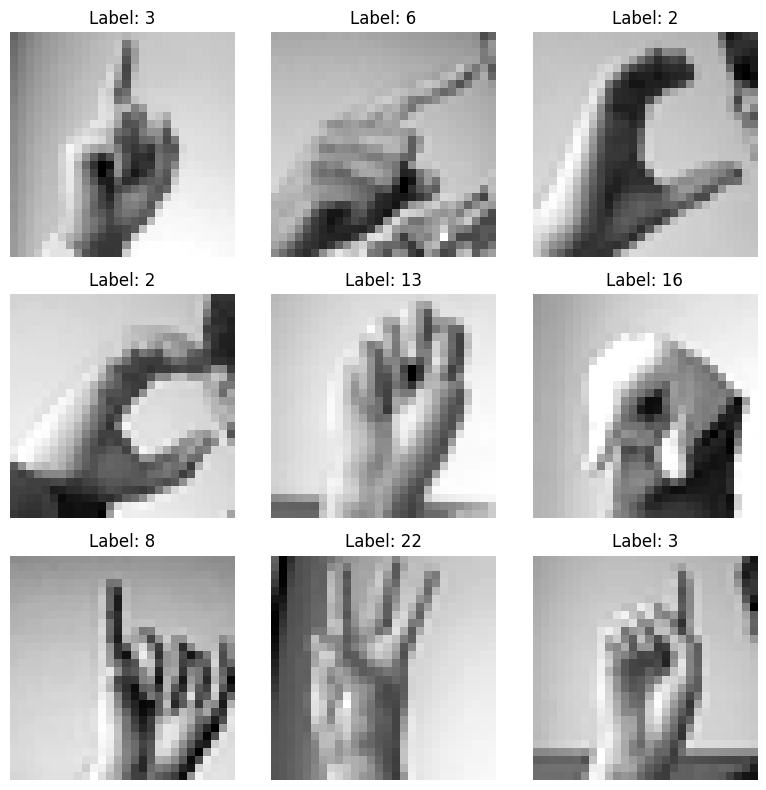

In [5]:
# Separar etiquetas y píxeles
y_train = train_data['label'].values
X_train = train_data.drop('label', axis=1).values

# Normalizar los datos (opcional: escala de 0 a 1)
X_train = X_train / 255.0

# Transformar cada fila a una matriz de 28x28
X_train_images = X_train.reshape(-1, 28, 28)


# Mostrar un conjunto de imágenes
def plot_images(images, labels, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar 9 imágenes de ejemplo
plot_images(X_train_images, y_train, num_images=9)


Mostramos las etiquetas correspondientes

In [6]:
# Diccionario de mapeo
label_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
    7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O',
    14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U',
    20: 'V', 21: 'W', 22: 'X', 23: 'Y'
}

# Ejemplo: Convertir labels a letras
labels = [3, 6, 2, 13, 16]  # Labels de ejemplo
letters = [label_to_letter[label] for label in labels]

print("Labels:", labels)
print("Letras:", letters)


Labels: [3, 6, 2, 13, 16]
Letras: ['D', 'G', 'C', 'O', 'R']


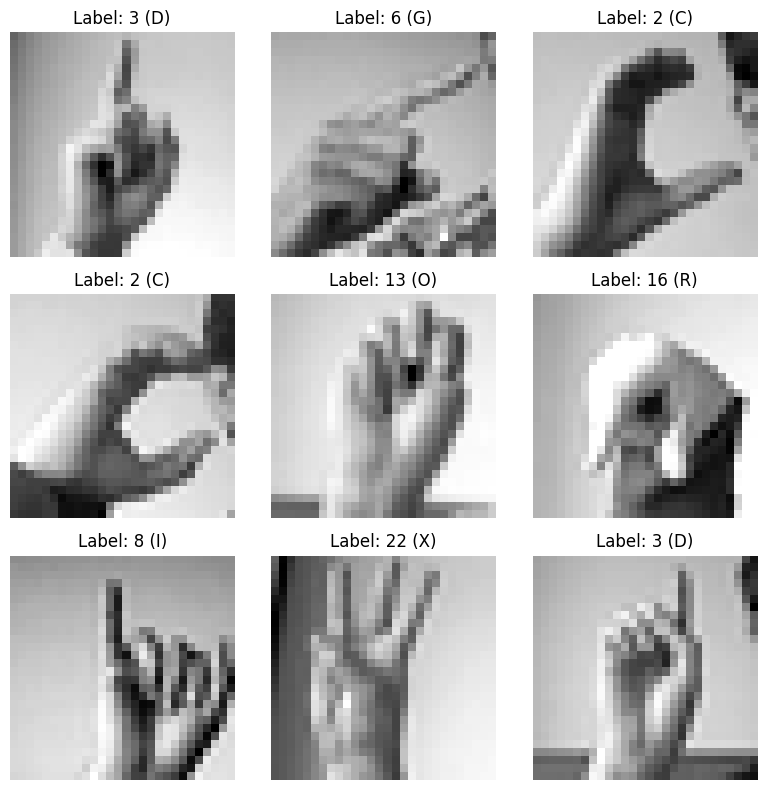

In [7]:
def plot_images_with_letters(images, labels, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        letter = label_to_letter[labels[i]]
        plt.title(f"Label: {labels[i]} ({letter})")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar con letras
plot_images_with_letters(X_train_images, y_train, num_images=9)


In [8]:
# Ver cantidad de datos
print(f"Datos de entrenamiento: {len(train_data)}")
print(f"Datos de prueba: {len(test_data)}")

Datos de entrenamiento: 27455
Datos de prueba: 7172


In [9]:
# Contar las clases y convertir labels a letras
train_class_counts = train_data['label'].value_counts().sort_index().rename(index=label_to_letter)
test_class_counts = test_data['label'].value_counts().sort_index().rename(index=label_to_letter)

# Imprimir resultados
print("Clases en el conjunto de entrenamiento:")
print(train_class_counts)

print("\nClases en el conjunto de prueba:")
print(test_class_counts)


Clases en el conjunto de entrenamiento:
label
A     1126
B     1010
C     1144
D     1196
E      957
F     1204
G     1090
H     1013
I     1162
L     1114
M     1241
N     1055
O     1151
P     1196
Q     1088
R     1279
S     1294
T     1199
U     1186
V     1161
W     1082
X     1225
Y     1164
24    1118
Name: count, dtype: int64

Clases en el conjunto de prueba:
label
A     331
B     432
C     310
D     245
E     498
F     247
G     348
H     436
I     288
L     331
M     209
N     394
O     291
P     246
Q     347
R     164
S     144
T     246
U     248
V     266
W     346
X     206
Y     267
24    332
Name: count, dtype: int64


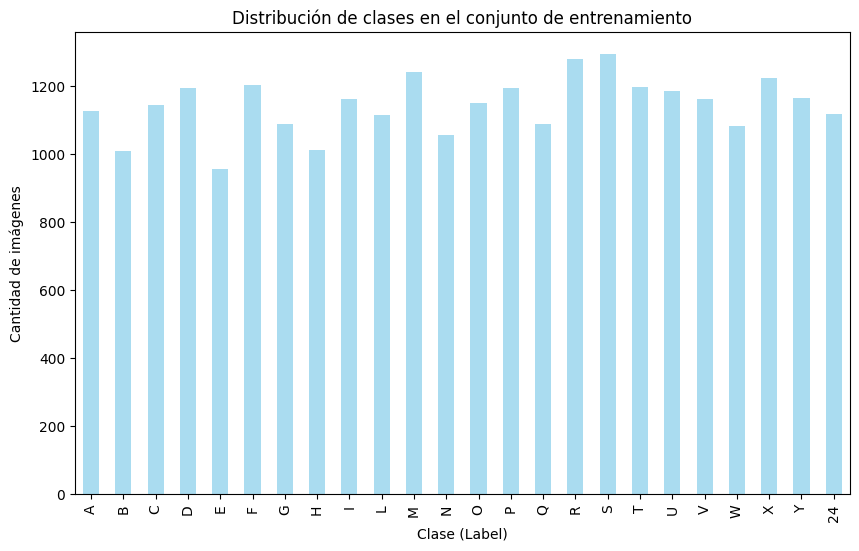

In [10]:
# Visualizar distribución
train_class_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.7)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase (Label)")
plt.ylabel("Cantidad de imágenes")
plt.show()


# Dataset con landmarks

In [11]:
# Inicializar MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [12]:
# Función para procesar imágenes y extraer landmarks
def process_image(pixels, label):
    # Convertir píxeles a una imagen 28x28
    image = np.array(pixels, dtype=np.uint8).reshape(28, 28)

    # Convertir a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Procesar la imagen con MediaPipe
    results = hands.process(image_rgb)

    # Si se detectan landmarks, extraerlos
    if results.multi_hand_landmarks:
        landmarks = []
        for hand_landmarks in results.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z])
        return [label] + landmarks
    return None  # Si no se detectan landmarks, devolver None


In [13]:
# Procesar todas las imágenes del dataset
def create_landmarks_dataset(data, output_file):
    dataset = []
    for _, row in tqdm(data.iterrows(), total=len(data)):
        # Extraer píxeles y etiqueta
        label = row['label']
        pixels = row.iloc[1:]  # Los píxeles están desde la segunda columna en adelante

        # Procesar imagen y obtener landmarks
        processed_data = process_image(pixels, label)
        if processed_data:
            dataset.append(processed_data)

    # Crear un DataFrame y guardar
    columns = ['label'] + [f"landmark_{i}" for i in range(63)]  # 21 puntos clave * 3 coordenadas (x, y, z)
    df = pd.DataFrame(dataset, columns=columns)
    df.to_csv(output_file, index=False)
    print(f"Nuevo dataset guardado en {output_file}")

# Crear dataset de entrenamiento
create_landmarks_dataset(train_data, "train_landmarks.csv")

# Crear dataset de prueba
create_landmarks_dataset(test_data, "test_landmarks.csv")

# Liberar recursos de MediaPipe
hands.close()


100%|██████████| 27455/27455 [13:47<00:00, 33.18it/s]


Nuevo dataset guardado en train_landmarks.csv


100%|██████████| 7172/7172 [03:38<00:00, 32.78it/s]

Nuevo dataset guardado en test_landmarks.csv


In [14]:
!mv test_landmarks.csv ComputerVision/
!mv train_landmarks.csv ComputerVision/

In [15]:
!git config --global user.email "laravaleri15@gmail.com"
!git config --global user.name "LaraV15"

In [16]:
# Cambia al directorio del repositorio
%cd /content/ComputerVision

# Agrega los archivos al índice
!git add train_landmarks.csv test_landmarks.csv

# Crea un commit con un mensaje
!git commit -m "Dataset with landmarks"

# Sube los cambios al repositorio remoto
!git push origin main


/content/ComputerVision
[main 87cd10a] Dataset with landmarks
 2 files changed, 464 insertions(+)
 create mode 100644 test_landmarks.csv
 create mode 100644 train_landmarks.csv
fatal: could not read Username for 'https://github.com': No such device or address


In [19]:
# Además descargados los dataset
files.download("train_landmarks.csv")
files.download("test_landmarks.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>